# Summary
Even though RandomForest works well
and has the best score,
I do not really learn anything new.
Doing LinearRegression and Ridge just leads me
to asking more questions.
I learn more if I try to improve it this way.

## What I know so far
**Iteration 7.**
Added _others_rooms as feature that counts the rooms
that are not bedrooms.
Also, added a ratio of bedrooms vs non-bedrooms.

**Iteration 6.**
Added all the categorical text features.
Removed some numerical features that had low correlation
to the target.
The linear regression improved but there are still some outliers.
Ridge training improved but test is way off. Overfitting.

**Iteration 5.**
I have started to integrate the text categorical features.
Starting with Neighboorhood.
The test score improved at the sacrifice of the training score.

**Iteration 4.**
I understand that linear regression (LR) is doing way worst
in fitting the points.
The there seems to be some points that are large outliers
when LR is used for prediction.
When I use Ridge, the model generalizes it better and 
the outliers does not pull the model in giving out
weird predictions.

**Iteration 3.**
RandomForest still wins.
This version, I have adjusted the pipeline to transform
the features into a polynomial, scaled it.
When comparing predictions and true sale prices,
the relationship seems to bend upwards.
Doing polynomial, keeps the line straight.
Need to scale it because of ridge.
I also looked at some categorical that had some sort of order
with them. I just replaced them with numeric and added them
in the pipeline.

**Iteration 2.**
Blindly adding all Categorical features.
There are some categorical that are in training
but are not in testing.
So, I just kept running the pipeline and removing
problamatic categorical features until it worked.
This improved the score.

**Iteration 1.**
Blindly added all numerical features only.
Nothing fancy. Just wanted to have a baseline.

## Scoring Versions.
    7. Added _other_rooms and _beds_ratio features.
    model_base 76391.57430733932 76213.62887190148
    model_tune 38149.485803033094 97213.2761817984
    
    6. Added all categorical text and remove some numeric features.
    model_base 84983.2018852683 72844.30233778527
    model_tune 40442.100924493134 97565.43554013727
    
    5. Added Neighborhood as categorical feature.
    model_base 1.2693973681523494e+16 50537.44091875372
    model_tune 56743.66686444727 51401.579084512516
    
    4. Linear Regression and Ridge.
    model_base 1.4488670555416282e+16 54538.32600176213
    model_tune 54124.36066008286 55844.18222280358
    
    3. Encoded categorical that are ordered. RandomForest
    model_base 29581.92123767121 45637.69717668411
    model_tune 28454.07259678302 44573.59896205597
    
    2. Include Categorical. RandomForest
    model_base 29761.712624668104 45622.31938365163
    model_tune 30398.282498063614 46175.65530935336
    
    1. Baseline. numeric only. RandomForest
    model_base 30027.52817329832 44130.043234907316
    model_tune 29193.731684252467 44415.39678678987

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

# df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df = pd.read_csv('input/train.csv')

num = [x for x in df.columns if df.dtypes[x] in ('int64', 'float')]
cat = [x for x in df.columns if df.dtypes[x] == 'object']
target = 'SalePrice'
num.remove(target)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=0)

# Explore

In [209]:
corr = train.corr(numeric_only=True)
corr[target].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790636
GrLivArea        0.721707
GarageCars       0.660927
GarageArea       0.646603
TotalBsmtSF      0.635535
1stFlrSF         0.620740
FullBath         0.578134
TotRmsAbvGrd     0.542658
YearBuilt        0.521242
YearRemodAdd     0.517822
GarageYrBlt      0.494154
MasVnrArea       0.493482
Fireplaces       0.470320
BsmtFinSF1       0.401390
LotFrontage      0.360274
OpenPorchSF      0.320193
2ndFlrSF         0.320141
WoodDeckSF       0.311813
HalfBath         0.283762
LotArea          0.252766
BsmtFullBath     0.226432
BsmtUnfSF        0.206736
BedroomAbvGr     0.182258
ScreenPorch      0.096740
3SsnPorch        0.057561
MoSold           0.041369
PoolArea         0.027441
BsmtHalfBath    -0.010994
Id              -0.017389
BsmtFinSF2      -0.020622
LowQualFinSF    -0.023128
MiscVal         -0.024750
YrSold          -0.045628
OverallCond     -0.053643
MSSubClass      -0.084312
EnclosedPorch   -0.129519
KitchenAbvGr    -0.136104
Name: SalePr

count      1168.000000
mean     180808.898973
std       78499.911304
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64


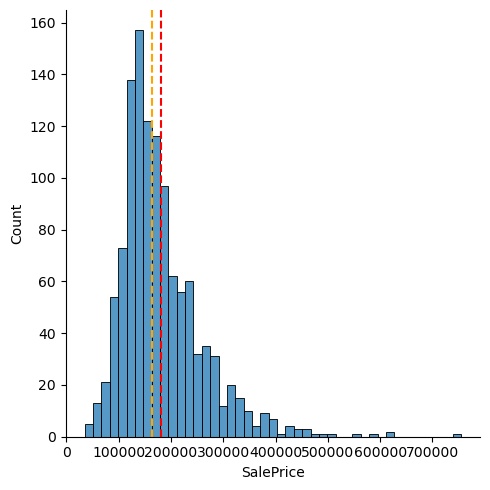

In [210]:
g = sns.FacetGrid(train[target], height=5)
g.map_dataframe(sns.histplot);
g.refline(x=train[target].mean(), color='red');
g.refline(x=train[target].median(), color='orange');
print(train[target].describe())

So far, I have been blindly adding features in without understanding them
I have also taking for granted the target SalePrice without
really knowing the average and the boundaries.
As a result, whenever I dissect the residuals of the predictions
of my models,
I just completely have no idea what to do next.
I need to understand the target distribution
so that I would know if what I am looking at 
is an outlier
or understand why my model predicted a very large number.






























In [211]:
train.loc[train[target]>500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933


In [212]:
train.groupby('SaleType')[target].describe()

,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,33.0,144389.393939,49832.531665,60000.0,114500.00,139000.0,158000.00,287000.0
CWD,1.0,328900.000000,NaN,328900.0,328900.00,328900.0,328900.00,328900.0
Con,1.0,215200.000000,NaN,215200.0,215200.00,215200.0,215200.00,215200.0
ConLD,7.0,129432.571429,56288.916253,79900.0,83000.00,125000.0,150000.00,235128.0
ConLI,4.0,221737.500000,158444.235064,110000.0,121250.00,162500.0,262987.50,451950.0
ConLw,5.0,143700.000000,67291.901444,60000.0,95000.00,144000.0,207500.00,212000.0
New,96.0,280094.270833,105998.099994,113000.0,198955.75,252985.5,340473.25,611657.0
Oth,2.0,121750.000000,39951.533137,93500.0,107625.00,121750.0,135875.00,150000.0
WD,1019.0,172945.844946,68775.396301,34900.0,129000.00,158000.0,205000.00,755000.0


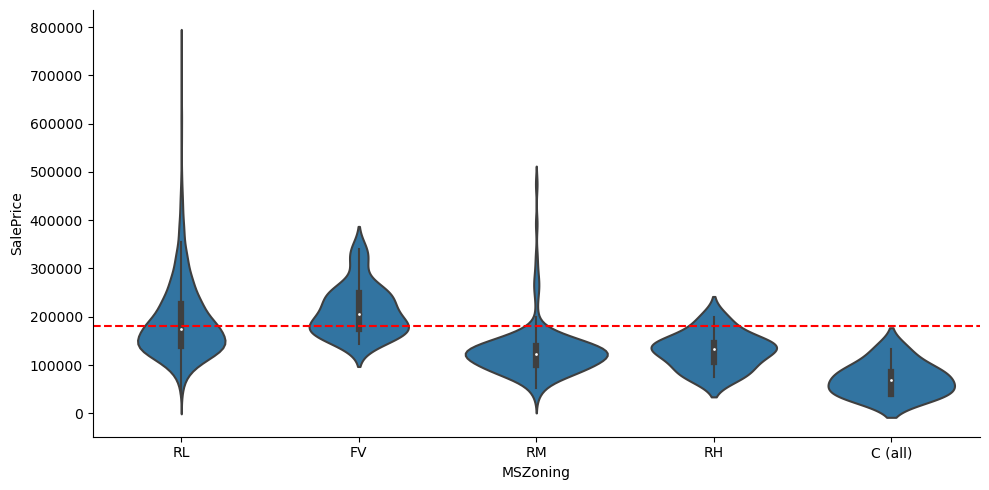

In [213]:
g = sns.FacetGrid(train, height=5, aspect=2)
g.map_dataframe(sns.violinplot, x='MSZoning', y=target);
g.refline(y=train[target].mean(), color='red');

In [214]:
np.array(num)

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype='<U13')

In [215]:
train['_other_rooms'] = train['TotRmsAbvGrd'] - train['BedroomAbvGr']
train['_beds_ratio'] = train['_other_rooms'] / train['TotRmsAbvGrd'] 

In [216]:
train.corr(numeric_only=True)[target].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790636
GrLivArea        0.721707
GarageCars       0.660927
GarageArea       0.646603
TotalBsmtSF      0.635535
1stFlrSF         0.620740
_other_rooms     0.598881
FullBath         0.578134
TotRmsAbvGrd     0.542658
YearBuilt        0.521242
YearRemodAdd     0.517822
GarageYrBlt      0.494154
MasVnrArea       0.493482
Fireplaces       0.470320
BsmtFinSF1       0.401390
LotFrontage      0.360274
_beds_ratio      0.338376
OpenPorchSF      0.320193
2ndFlrSF         0.320141
WoodDeckSF       0.311813
HalfBath         0.283762
LotArea          0.252766
BsmtFullBath     0.226432
BsmtUnfSF        0.206736
BedroomAbvGr     0.182258
ScreenPorch      0.096740
3SsnPorch        0.057561
MoSold           0.041369
PoolArea         0.027441
BsmtHalfBath    -0.010994
Id              -0.017389
BsmtFinSF2      -0.020622
LowQualFinSF    -0.023128
MiscVal         -0.024750
YrSold          -0.045628
OverallCond     -0.053643
MSSubClass      -0.084312
EnclosedPorc

# Pipeline

In [217]:
num_pk = [x for x in num if x not in 
          ['ScreenPorch', '3SsnPorch', 'MoSold', 'PoolArea', 'BsmtHalfBath'
           , 'Id', 'BsmtFinSF2', 'LowQualFinSF', 'MiscVal', 'YrSold', 'OverallCond'
           , 'MSSubClass']]

In [218]:
cat_pk = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [219]:
ord_pk = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond'
          , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
          , 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
blu = {
    'ExterQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'ExterCond': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'BsmtQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'BsmtCond': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'BsmtExposure': {'key': ['Gd','Av','Mn','No'], 'val': [3,2,1,0]}
    , 'BsmtFinType1': {'key': ['GLQ','ALQ','BLQ','Rec','LWQ','Unf'], 'val': [5,4,3,2,1,0]}
    , 'BsmtFinType2': {'key': ['GLQ','ALQ','BLQ','Rec','LWQ','Unf'], 'val': [5,4,3,2,1,0]}
    , 'HeatingQC': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'KitchenQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'FireplaceQu': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'GarageQual': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'GarageCond': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
    , 'PoolQC': {'key': ['Ex','Gd','TA','Fa','Po'], 'val': [5,4,3,2,1]}
}

In [220]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [221]:
class DataSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes]
    
class CustomEncode(BaseEstimator, TransformerMixin):
    def __init__(self, led):
        self.led = led
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        dat = {}
        for itm in self.led:
            dat['y_'+itm] = X[itm].map({
                x:y for x,y in zip(self.led[itm]['key']
                                   , self.led[itm]['val'])})
        return pd.DataFrame(dat).fillna(0)
    
class EngineerFeature(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        frame = pd.DataFrame({
            '_other_rooms': X['TotRmsAbvGrd'] - X['BedroomAbvGr']
            ,'_beds_ratio': (X['TotRmsAbvGrd'] - X['BedroomAbvGr']) / X['TotRmsAbvGrd'] 
        })
        return pd.concat([X, frame], axis=1)

In [222]:
num_pp = Pipeline([
    ('dataselect', DataSelect(num_pk))
    , ('engineer', EngineerFeature())
    , ('impute', SimpleImputer(strategy='median'))
    , ('poly', PolynomialFeatures())
    , ('scaler', StandardScaler())
])

ord_pp = Pipeline([
    ('dataselect', DataSelect(ord_pk))
    , ('customencode', CustomEncode(blu))
    , ('poly', PolynomialFeatures())
    , ('scaler', StandardScaler())
])

cat_pp = Pipeline([
    ('dataselect', DataSelect(cat_pk))
    , ('impute', SimpleImputer(strategy='constant'))
    , ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

pipe = FeatureUnion([
    ('numeric', num_pp)
    , ('cat_order', ord_pp)
    , ('cat_text', cat_pp)
])

pipe.fit(train)
train_pre = pipe.transform(train)
test_pre = pipe.transform(test)

# Model

In [223]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [224]:
lin_reg = LinearRegression()
lin_reg.fit(train_pre, train[target])
print(np.sqrt(-cross_val_score(lin_reg, train_pre, train[target], scoring='neg_mean_squared_error').mean()))
model_base = lin_reg

76391.57430733932


In [225]:
rid_reg = Ridge(10)
rid_reg.fit(train_pre, train[target])
print(np.sqrt(-cross_val_score(rid_reg, train_pre, train[target], scoring='neg_mean_squared_error').mean()))
model_tune = rid_reg

38149.485803033094


# Validation

In [226]:
print('model_base'
, np.sqrt(-cross_val_score(model_base, train_pre, train[target], scoring='neg_mean_squared_error').mean())
, np.sqrt(-cross_val_score(model_base, test_pre, test[target], scoring='neg_mean_squared_error').mean())
)

print('model_tune'
, np.sqrt(-cross_val_score(model_tune, train_pre, train[target], scoring='neg_mean_squared_error').mean())
, np.sqrt(-cross_val_score(model_tune, test_pre, test[target], scoring='neg_mean_squared_error').mean())
)

model_base 76391.57430733932 76213.62887190148
model_tune 38149.485803033094 97213.2761817984


# Submission

In [227]:
# samp = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
# pd.DataFrame({
#     'Id': samp['Id']
#     , 'SalePrice': model_tune.predict(pipe.transform(samp))
# }).to_csv('submission.csv', index=False)

# Residual Analysis

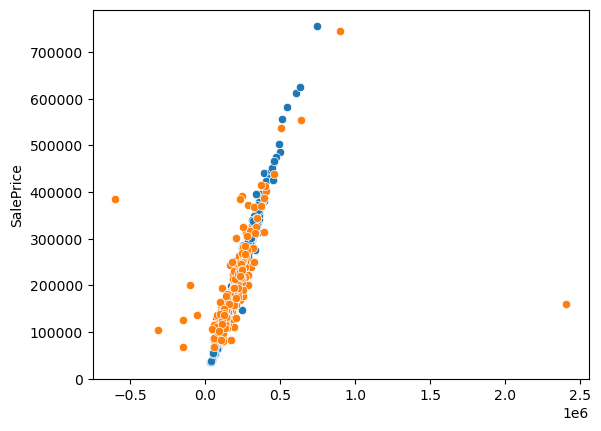

In [228]:
X = model_base.predict(train_pre)
Y = train[target]
Xhat = model_base.predict(test_pre)
Yhat = test[target]
sns.scatterplot(x=X, y=Y);
sns.scatterplot(x=Xhat, y=Yhat);

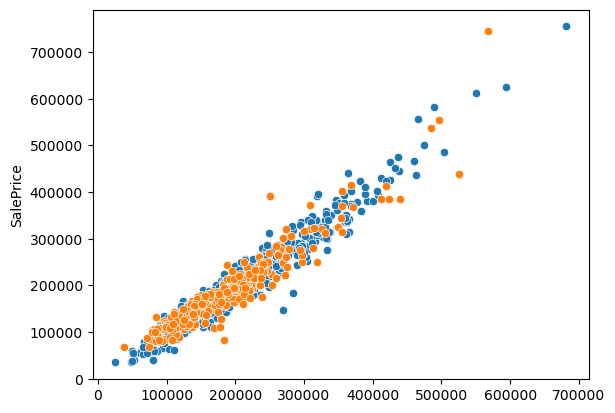

In [229]:
X = model_tune.predict(train_pre)
Y = train[target]
Xhat = model_tune.predict(test_pre)
Yhat = test[target]
sns.scatterplot(x=X, y=Y);
sns.scatterplot(x=Xhat, y=Yhat);